In [21]:
import numpy as np
import pandas as pd
from PIL import Image

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import os

In [22]:
files = ['blast', 'blight', 'tungro']  # Replace with actual folder names
path = "D:/Citra Daun Padi"

data = []
for id, level in enumerate(files):
    for file in os.listdir(os.path.join(path, level)):
        data.append([level + '/' + file, level])

data = pd.DataFrame(data, columns=['image_file', 'class_label'])

data['path'] = path + '/' + data['image_file']
data['class_label'] = data['class_label'].map({
    'blast': 'blast',  # Replace with actual mappings
    'blight': 'blight',
    'tungro': 'tungro'
})

data.head()

,image_file,class_label,path
0,blast/IMG (119).jpg,blast,D:/Citra Daun Padi/blast/IMG (119).jpg
1,blast/IMG (120).jpg,blast,D:/Citra Daun Padi/blast/IMG (120).jpg
2,blast/IMG (121).jpg,blast,D:/Citra Daun Padi/blast/IMG (121).jpg
3,blast/IMG (122).jpg,blast,D:/Citra Daun Padi/blast/IMG (122).jpg
4,blast/IMG (123).jpg,blast,D:/Citra Daun Padi/blast/IMG (123).jpg


In [23]:
#Lets print the shape of the Training Data
print('The shape of the Training Data is:', {data.shape})
print('The Number of Rows  in the Training Data is:', data.shape[0])
print('The Number of Column  in the Training Data is:', data.shape[1])


The shape of the Training Data is: {(500, 3)}
The Number of Rows  in the Training Data is: 500
The Number of Column  in the Training Data is: 3


In [24]:
print('Number of Duplicated Samples: %d'%(data.duplicated().sum()))
print('Number of Total Samples: %d'%(data.isnull().value_counts()))

Number of Duplicated Samples: 0
Number of Total Samples: 500


In [25]:
data.isnull().sum()

image_file     0
class_label    0
path           0
dtype: int64

In [26]:
import plotly.express as px

no_of_samples = 500

# Assuming 'data' is your DataFrame
data['class_label'] = data['class_label'].map({
    'blast': 'blast',
    'blight': 'blight',
    'tungro': 'tungro'
})

# Create a DataFrame with counts for each class
df = pd.DataFrame({
    'class_label': ['blast', 'blight', 'tungro'],
    'Count': [
        len(data[data['class_label'] == 'blast']),
        len(data[data['class_label'] == 'blight']),
        len(data[data['class_label'] == 'tungro'])
    ]
})

# Sort the DataFrame by Count
df = df.sort_values(by=['Count'], ascending=False)

# Plot the bar chart
fig = px.bar(df, x='class_label', y='Count', 
             color="class_label", width=600, 
             color_continuous_scale='BrBg')

fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)

fig.show()

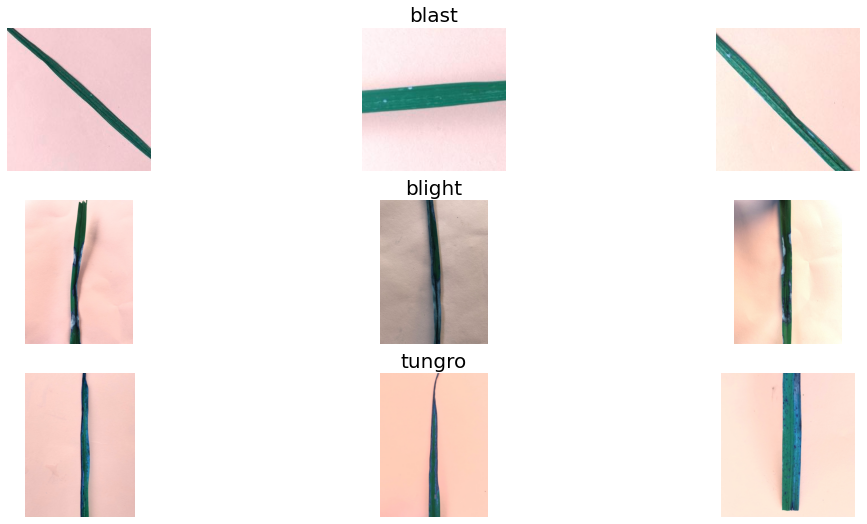

In [27]:
import cv2
import random
n_samples = 3

fig, m_axs = plt.subplots(3, n_samples, figsize = (6*n_samples, 3*3))

for n_axs, (type_name, type_rows) in zip(m_axs, data.sort_values(['class_label']).groupby('class_label')):
    n_axs[1].set_title(type_name, fontsize = 20)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state = 1234).iterrows()):       
        picture = c_row['path']
        image = cv2.imread(picture)
        c_ax.imshow(image)
        c_ax.axis('off')

In [28]:
import cv2
import matplotlib.pyplot as plt

def random_analysis(image_path):
    # Load the image
    image = cv2.imread(image_path)

    if image is None:
        print("Error: Image not found or cannot be loaded.")
        return

    # Convert BGR to RGB for proper display
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Create figure
    fig = plt.figure(figsize=(15, 10))

    # Setting values to rows and column variables
    rows = 2
    columns = 3

    # Adds a subplot at the 1st position
    ax1 = fig.add_subplot(rows, columns, 1)
    ax1.set_title('Original', fontsize=14)
    ax1.imshow(image_rgb)
    ax1.axis('off')

    # Adds a subplot at the 2nd position (B channel)
    ax2 = fig.add_subplot(rows, columns, 2)
    if image.shape[2] == 3:
        ax2.set_title('B Channel', fontsize=14)
        ax2.imshow(image[:, :, 0], cmap='gray')
    else:
        ax2.set_title('Single Channel', fontsize=14)
        ax2.imshow(image, cmap='gray')
    ax2.axis('off')

    # Adds a subplot at the 3rd position (Ben Graham's Method)
    ax3 = fig.add_subplot(rows, columns, 3)
    img = cv2.resize(image, (512, 512))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    img = cv2.addWeighted(img, 4, cv2.GaussianBlur(img, (0, 0), 512/10), -4, 128)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_HSV2RGB)
    ax3.set_title("Ben Graham's Method", fontsize=14)
    ax3.imshow(img_rgb)
    ax3.axis('off')

    # Extracting and printing image details
    list_text = image_path.split("/")
    
    # Ensure list_text has enough parts
    if len(list_text) > 5:
        detail_label = list_text[5]
    else:
        detail_label = "UNKNOWN"

    print("\n-----------------------------{}-----------------------------\n".format("IMAGE DETAILS" + " ( " + detail_label.upper() + " )"))

    print('Image Shape: {}'.format(image.shape))
    print('Image Height: {}'.format(image.shape[0]))
    print('Image Width: {}'.format(image.shape[1]))
    print('Image Dimension: {}'.format(image.ndim))
    print('Image Size: {}kb'.format(image.size // 1024))
    print('Image Data Type: {}'.format(image.dtype))
    print('Maximum RGB value of the image: {}'.format(image.max()))
    print('Minimum RGB value of the image: {}'.format(image.min()))

    plt.show()




In [29]:
# Path to your dataset
path = "D:/Citra Daun Padi"
# Replace with actual folder names
files = ['blast', 'blight', 'tungro'] 

# List to store selected images
list_images_sample = []

# Iterate through each folder and select one random image
for level in files:
    folder_path = os.path.join(path, level)
    if os.path.exists(folder_path):
        images = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.png') or file.endswith('.jpg')]
        if images:  # Check if there are any images in the folder
            selected_image = random.choice(images)
            list_images_sample.append(selected_image)

list_images_sample



['D:/Citra Daun Padi\\blast\\IMG_0550.jpg',
 'D:/Citra Daun Padi\\blight\\IMG_0365 (118).jpg',
 'D:/Citra Daun Padi\\tungro\\IMG_0888.jpg']


-----------------------------IMAGE DETAILS ( UNKNOWN )-----------------------------

Image Shape: (1920, 1440, 3)
Image Height: 1920
Image Width: 1440
Image Dimension: 3
Image Size: 8100kb
Image Data Type: uint8
Maximum RGB value of the image: 255
Minimum RGB value of the image: 0


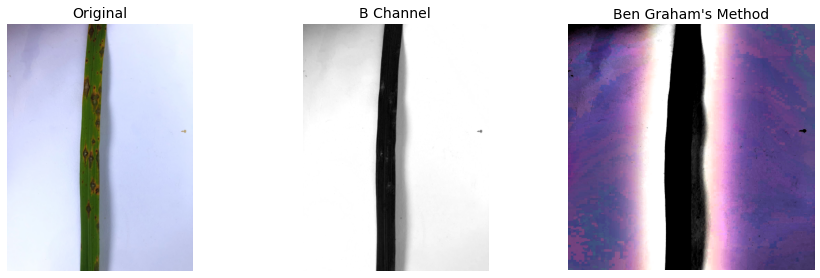

In [30]:
random_analysis(list_images_sample[0])


-----------------------------IMAGE DETAILS ( UNKNOWN )-----------------------------

Image Shape: (897, 3081, 3)
Image Height: 897
Image Width: 3081
Image Dimension: 3
Image Size: 8096kb
Image Data Type: uint8
Maximum RGB value of the image: 255
Minimum RGB value of the image: 0


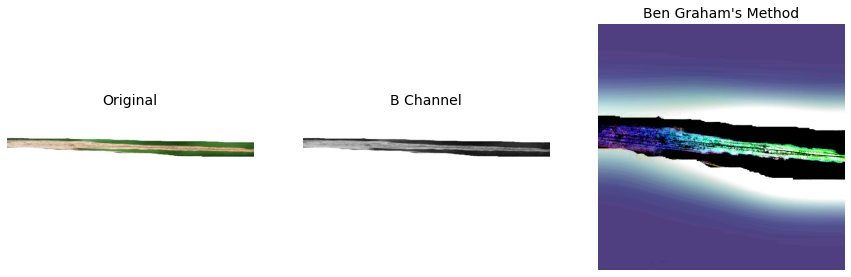

In [31]:
random_analysis(list_images_sample[1])


-----------------------------IMAGE DETAILS ( UNKNOWN )-----------------------------

Image Shape: (1920, 1424, 3)
Image Height: 1920
Image Width: 1424
Image Dimension: 3
Image Size: 8010kb
Image Data Type: uint8
Maximum RGB value of the image: 255
Minimum RGB value of the image: 0


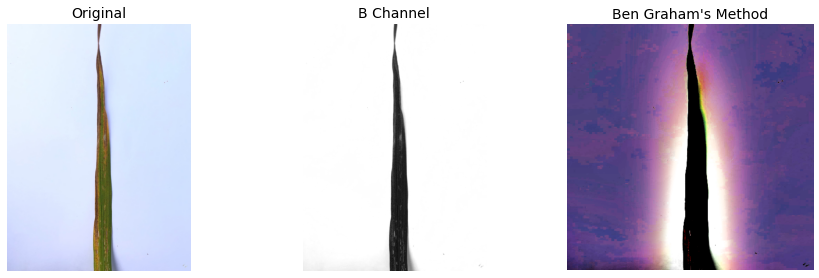

In [32]:
random_analysis(list_images_sample[2])

In [33]:
#menyeimbangkan data
from sklearn.utils import resample
data['class_label'] = data['class_label'].map({
    'blast': 'blast',
    'blight': 'blight',
    'tungro': 'tungro'
})

# Membuat DataFrame untuk masing-masing kelas
blight = data[data['class_label'] == 'blight']  # blight
blast = data[data['class_label'] == 'blast']   # blast
tungro = data[data['class_label'] == 'tungro']  # tungro

# Oversample tungro dan blast agar seimbang dengan blight
tungro_upsampled = resample(tungro, replace=True, n_samples=220, random_state=42)
blast_upsampled = resample(blast, replace=True, n_samples=220, random_state=42)

# Gabungkan kembali ke dalam satu DataFrame
data_balanced = pd.concat([blight, blast_upsampled, tungro_upsampled])
# Shuffle data agar acak
data_balanced = data_balanced.sample(frac=1).reset_index(drop=True)


In [35]:
data_balanced.head()

,image_file,class_label,path
0,blight/IMG_0365 (114).JPG,blight,D:/Citra Daun Padi/blight/IMG_0365 (114).JPG
1,blast/IMG (131).jpg,blast,D:/Citra Daun Padi/blast/IMG (131).jpg
2,blast/IMG_0704.jpg,blast,D:/Citra Daun Padi/blast/IMG_0704.jpg
3,tungro/IMG_0912.jpg,tungro,D:/Citra Daun Padi/tungro/IMG_0912.jpg
4,blast/IMG (121).jpg,blast,D:/Citra Daun Padi/blast/IMG (121).jpg


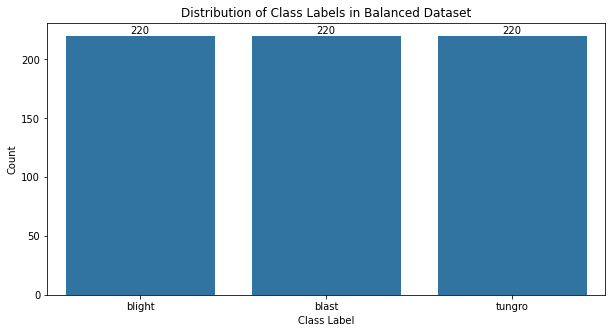

In [48]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data=data_balanced, x='class_label')

ax.bar_label(ax.containers[0])
plt.title('Distribution of Class Labels in Balanced Dataset')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.show()

In [60]:
#pemodelan datta
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image size and batch size
IMG_SIZE = (224, 224)  # MobileNetV3 default input size
BATCH_SIZE = 32

# Load and preprocess data
#path = 'data_balanced'  # Change to your image directory

# Assuming 'data_balanced' is the DataFrame after oversampling
data = data_balanced  # Make sure this points to your balanced DataFrame

# Split data into training and validation sets
train_data, val_data = train_test_split(data, test_size=0.2, stratify=data['class_label'])

# Create ImageDataGenerator instances with enhanced data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Create training and validation generators
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_data,
    x_col='image_file',
    y_col='class_label',
    #directory=path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_data,
    x_col='image_file',
    y_col='class_label',
    #directory=path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 528 validated image filenames belonging to 3 classes.


Found 132 validated image filenames belonging to 3 classes.


In [61]:
print(train_data.head())
print(val_data.head())

                   image_file class_label  \
78        tungro/IMG_0688.jpg      tungro   
174      blast/IMG  (222).jpg       blast   
347  blight/IMG_0365 (62).JPG      blight   
38        tungro/IMG_0858.jpg      tungro   
14         blast/IMG_0704.jpg       blast   

                                            path  
78        D:/Citra Daun Padi/tungro/IMG_0688.jpg  
174      D:/Citra Daun Padi/blast/IMG  (222).jpg  
347  D:/Citra Daun Padi/blight/IMG_0365 (62).JPG  
38        D:/Citra Daun Padi/tungro/IMG_0858.jpg  
14         D:/Citra Daun Padi/blast/IMG_0704.jpg  
                    image_file class_label  \
276        tungro/IMG_0715.jpg      tungro   
324   blight/IMG_0365 (53).JPG      blight   
176  blight/IMG_0365 (102).JPG      blight   
212        tungro/IMG_0826.jpg      tungro   
54        blast/IMG  (148).jpg       blast   

                                             path  
276        D:/Citra Daun Padi/tungro/IMG_0715.jpg  
324   D:/Citra Daun Padi/blight/IMG_0365 (

In [62]:
# Debugging: Periksa beberapa gambar dari generator
for data_batch, labels_batch in train_generator:
    print("Data batch shape:", data_batch.shape)
    print("Labels batch shape:", labels_batch.shape)
    break

Data batch shape: (32, 224, 224, 3)
Labels batch shape: (32, 3)


In [70]:
from tensorflow.keras.applications import MobileNetV3Large
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from tensorflow.keras.regularizers import l2

# Build and compile the MobileNetV3 model with increased dense units and Dropout
base_model = MobileNetV3Large(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze some layers of the base model
for layer in base_model.layers[:-20]:
    layer.trainable = False

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(2048, activation='relu', kernel_regularizer=l2(0.01))(x)  # Add L2 Regularization
x = Dropout(0.5)(x)  # Add Dropout
x = Dense(len(train_generator.class_indices), activation='softmax')(x)

# Build and compile the model
model = Model(inputs=base_model.input, outputs=x)

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define callbacks
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

model_checkpoint = ModelCheckpoint(
    'mobilenetv3_best_model.keras',  # Save best model
    save_best_only=True,
    monitor='val_loss'
)

# Train the model
history = model.fit(
    train_generator,
    epochs=100,
    validation_data=val_generator,
    callbacks=[lr_scheduler, early_stopping, model_checkpoint]
)

# Evaluate the model
val_loss, val_acc = model.evaluate(val_generator)
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_acc}')


Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step - accuracy: 0.4005 - loss: 13.9179 - val_accuracy: 0.3333 - val_loss: 13.3513 - learning_rate: 1.0000e-04
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.4973 - loss: 12.8642 - val_accuracy: 0.3333 - val_loss: 12.4718 - learning_rate: 1.0000e-04
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.5873 - loss: 11.9569 - val_accuracy: 0.3333 - val_loss: 11.6638 - learning_rate: 1.0000e-04
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.5609 - loss: 11.0640 - val_accuracy: 0.3333 - val_loss: 10.8578 - learning_rate: 1.0000e-04
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.5832 - loss: 10.3526 - val_accuracy: 0.3333 - val_loss: 10.2017 - learning_rate: 1.0000e-04
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.5813 - loss: 9.6470 - val_accuracy: 0.3333 - val_loss: 9.5389 - learning_rate: 1.0000e-04
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accurac

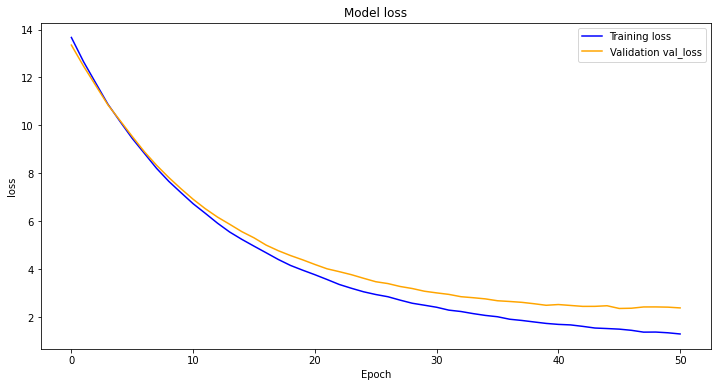

In [71]:

# plot the Training and validation loss
plt.figure(figsize=(12, 6))

plt.plot(history.history['loss'], label='Training loss', color='blue')

plt.plot(history.history['val_loss'], label='Validation val_loss', color='orange')

plt.xlabel('Epoch')
plt.ylabel('loss')
plt.title('Model loss')
plt.legend()
plt.show()

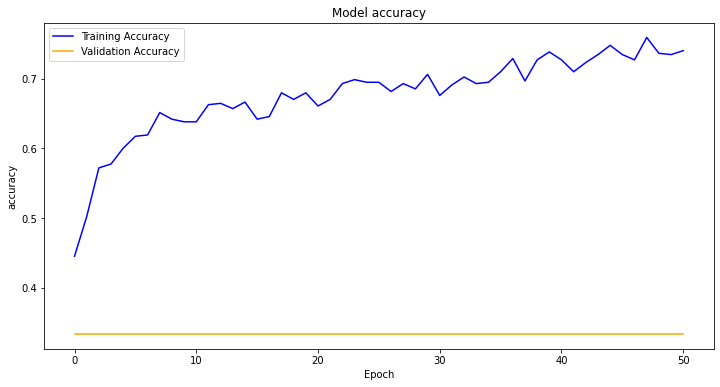

In [72]:
# plot the Training  and validation Accuracy
plt.figure(figsize=(12, 6))
# Plot training accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')

# Plot validation accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')

plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.legend()
plt.show()

In [73]:
# Evaluate the model
model.save('mobilenetv3_model.keras')

# Save the model
model.save('mobilenetv3_model.h5')

In [ ]:
import sys
print(sys.executable)


c:\Users\agian\anaconda3\python.exe


In [ ]:
pip show tensorflow

Name: tensorflow
Version: 2.17.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\users\agian\anaconda3\lib\site-packages
Requires: tensorflow-intel
Required-by: tf_keras
Note: you may need to restart the kernel to use updated packages.
